In [1]:
# Our Imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import date

# Data before ML Model

In [2]:
start = '2010-01-01' # We start with a date in order to give the model a start point 
end = date.today()

df = data.DataReader('AAPL', 'yahoo', start, end) # We also give it a starting ticker that will be chageable in the application
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556001
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482605


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-19,167.820007,163.910004,165.020004,167.399994,67723800.0,167.399994
2022-04-20,168.880005,166.100006,168.759995,167.229996,67929800.0,167.229996
2022-04-21,171.529999,165.910004,168.910004,166.419998,87227800.0,166.419998
2022-04-22,167.869995,161.500000,166.460007,161.789993,84775200.0,161.789993
2022-04-25,163.169998,158.460007,161.119995,162.880005,92824080.0,162.880005


In [4]:
df = df.reset_index() # Resets the index 
df.head

<bound method NDFrame.head of            Date        High         Low        Open       Close       Volume  \
0    2010-01-04    7.660714    7.585000    7.622500    7.643214  493729600.0   
1    2010-01-05    7.699643    7.616071    7.664286    7.656429  601904800.0   
2    2010-01-06    7.686786    7.526786    7.656429    7.534643  552160000.0   
3    2010-01-07    7.571429    7.466071    7.562500    7.520714  477131200.0   
4    2010-01-08    7.571429    7.466429    7.510714    7.570714  447610800.0   
...         ...         ...         ...         ...         ...          ...   
3094 2022-04-19  167.820007  163.910004  165.020004  167.399994   67723800.0   
3095 2022-04-20  168.880005  166.100006  168.759995  167.229996   67929800.0   
3096 2022-04-21  171.529999  165.910004  168.910004  166.419998   87227800.0   
3097 2022-04-22  167.869995  161.500000  166.460007  161.789993   84775200.0   
3098 2022-04-25  163.169998  158.460007  161.119995  162.880005   92824080.0   

       Ad

In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1) # Gives us a drop down menu 
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


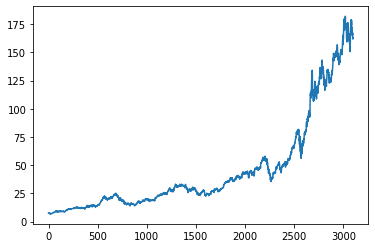

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0
...,...,...,...,...,...
3094,167.820007,163.910004,165.020004,167.399994,67723800.0
3095,168.880005,166.100006,168.759995,167.229996,67929800.0
3096,171.529999,165.910004,168.910004,166.419998,87227800.0
3097,167.869995,161.500000,166.460007,161.789993,84775200.0


In [8]:
ma100 = df.Close.rolling(100).mean() # THis is our first average we are looking to train
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3094    169.3203
3095    169.3732
3096    169.4693
3097    169.4848
3098    169.4606
Name: Close, Length: 3099, dtype: float64

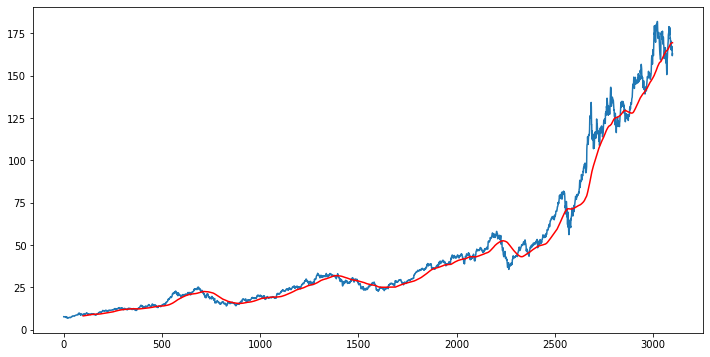

In [9]:
plt.figure(figsize = (12,6)) # Plot dimensions 
plt.plot(df.Close)
plt.plot(ma100, 'r')


In [10]:
ma200 = df.Close.rolling(200).mean() # This is our 2second average we are looking to train
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3094    158.64495
3095    158.77100
3096    158.88025
3097    158.97300
3098    159.06185
Name: Close, Length: 3099, dtype: float64

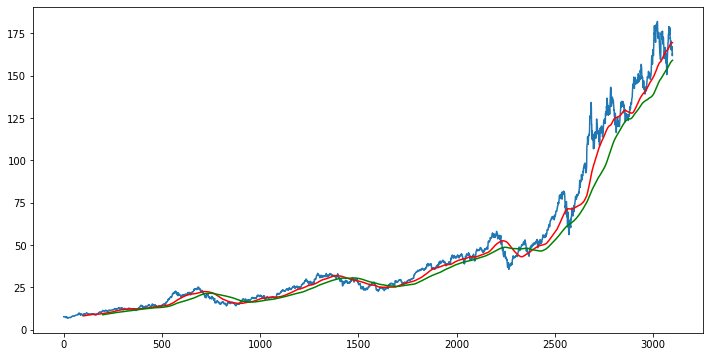

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(3099, 5)

In [13]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2169, 1)
(930, 1)


In [14]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
data_testing.head()

,Close
2169,52.560001
2170,53.330002
2171,54.395000
2172,53.865002
2173,53.759998


In [16]:
from sklearn.preprocessing import MinMaxScaler # Our scalar function
scaler = MinMaxScaler(feature_range = (0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01720732],
       [0.01749725],
       [0.01482526],
       ...,
       [0.98782322],
       [0.99517314],
       [1.        ]])

In [18]:
data_training_array.shape

(2169, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

# ML Model

In [20]:
x_train.shape

(2069, 100, 1)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
# This is our model that we are training
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True,
                input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [23]:
# Shows a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
# The model will be trained for 50 epochs
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
65/65 [==============================] - 10s 116ms/step - loss: 0.0278
Epoch 2/50
65/65 [==============================] - 7s 110ms/step - loss: 0.0067
Epoch 3/50
65/65 [==============================] - 7s 109ms/step - loss: 0.0050
Epoch 4/50
65/65 [==============================] - 7s 109ms/step - loss: 0.0053
Epoch 5/50
65/65 [==============================] - 7s 108ms/step - loss: 0.0047
Epoch 6/50
65/65 [==============================] - 7s 109ms/step - loss: 0.0044
Epoch 7/50
65/65 [==============================] - 7s 109ms/step - loss: 0.0045
Epoch 8/50
65/65 [==============================] - 7s 109ms/step - loss: 0.0042
Epoch 9/50
65/65 [==============================] - 7s 110ms/step - loss: 0.0038
Epoch 10/50
65/65 [==============================] - 7s 109ms/step - loss: 0.0034
Epoch 11/50
65/65 [==============================] - 7s 110ms/step - loss: 0.0036
Epoch 12/50
65/65 [==============================] - 7s 112ms/step - loss: 0.0038
Epoch 13/50
65/65 [=====

In [25]:
# Our model will be saved as the keras model the application will call 
model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
2169,52.560001
2170,53.330002
2171,54.395000
2172,53.865002
2173,53.759998


In [3]:
data_training.tail(100)

NameError: name 'data_training' is not defined

In [2]:
past_100_days = data_training.tail(100) # Gives us past 100 days 

NameError: name 'data_training' is not defined

In [4]:
final_df = past_100_days.append(data_testing, ignore_index = True)

NameError: name 'past_100_days' is not defined

In [30]:
final_df.head()

,Close
0,41.235001
1,43.192501
2,42.084999
3,41.619999
4,41.945000


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03883247],
       [0.05219767],
       [0.04463599],
       ...,
       [0.89355639],
       [0.86194417],
       [0.86938643]])

In [32]:
input_data.shape

(1030, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100: i])
    y_test.append(input_data[i, 0])

In [34]:
# Our testing gets put into an array to keep all data
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(930, 100, 1)
(930,)


In [35]:
# Making Predictions
y_predicted = model.predict(x_test)

In [36]:
y_predicted.shape

(930, 1)

In [37]:
y_test

array([0.11615602, 0.12141334, 0.12868482, 0.12506616, 0.12434923,
       0.12436631, 0.12511736, 0.126261  , 0.12929931, 0.13230349,
       0.13790219, 0.14140138, 0.14583939, 0.14708543, 0.14454211,
       0.13810704, 0.13503457, 0.12996501, 0.13938723, 0.13464199,
       0.14375694, 0.13937014, 0.1291969 , 0.1298114 , 0.13003328,
       0.13286677, 0.12882138, 0.13416403, 0.13655373, 0.13353247,
       0.14126483, 0.14261331, 0.14520781, 0.1486558 , 0.15341813,
       0.14645388, 0.14013825, 0.13925067, 0.14454211, 0.12660237,
       0.12334215, 0.13641717, 0.1283093 , 0.13648544, 0.13484681,
       0.12602203, 0.13163779, 0.13392506, 0.13747546, 0.12443458,
       0.13247419, 0.12649996, 0.11956987, 0.1213792 , 0.13086968,
       0.13660494, 0.1114449 , 0.10139113, 0.10511224, 0.115661  ,
       0.11316891, 0.10630708, 0.08872578, 0.08541435, 0.07614578,
       0.08401469, 0.08763335, 0.07454126, 0.05938379, 0.05904241,
       0.05137833, 0.05535546, 0.05470684, 0.06614321, 0.06377

In [38]:
y_predicted

array([[0.13621877],
       [0.13779545],
       [0.13932753],
       [0.14083982],
       [0.14234433],
       [0.14383751],
       [0.14530648],
       [0.14673585],
       [0.14811327],
       [0.14943948],
       [0.15072912],
       [0.15201846],
       [0.1533524 ],
       [0.15478009],
       [0.15633585],
       [0.15801705],
       [0.15976688],
       [0.16149712],
       [0.16310021],
       [0.16451906],
       [0.16570863],
       [0.16668911],
       [0.16748725],
       [0.16808322],
       [0.16845931],
       [0.16861334],
       [0.1685749 ],
       [0.168368  ],
       [0.16804823],
       [0.1676874 ],
       [0.16733432],
       [0.16705915],
       [0.16692372],
       [0.16697752],
       [0.16725981],
       [0.16780594],
       [0.16858914],
       [0.1695215 ],
       [0.17049766],
       [0.17144789],
       [0.17225221],
       [0.17279756],
       [0.17305705],
       [0.1730134 ],
       [0.1727153 ],
       [0.17222922],
       [0.171582  ],
       [0.170

In [39]:
scaler.scale_

array([0.00682769])

In [40]:
scale_factor = 1 / 0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

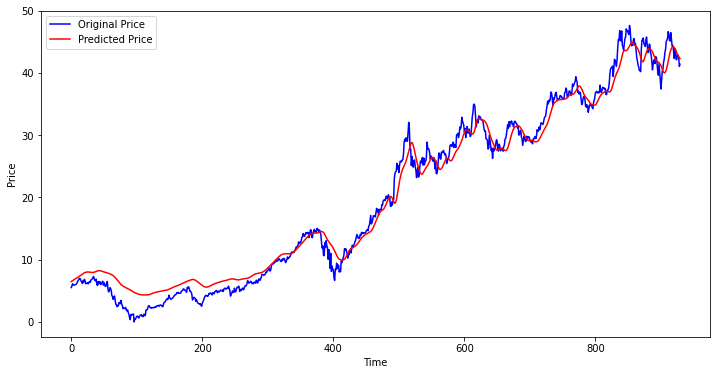

In [41]:
# Our final graph to plot
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show